# using the Data\CT-ADE-SOC dataset (from hugging face), the train a transfer learning model on that. get the SHAP values; then train the Explanability network

## Getting the dataset from Hugging face 

here's the link: https://huggingface.co/datasets/anthonyyazdaniml/CT-ADE-SOC/tree/main

**Got them Manually**

## EDA

In [4]:
import pandas as pd

# Update the path if needed
train_path = "Data/CT-ADE-SOC/train.csv"

# Load the train dataset
df = pd.read_csv(train_path)

# Show shape and first few rows
print(f"Shape: {df.shape}")
df.head()


Shape: (12419, 40)


,nctid,group_id,healthy_volunteers,gender,age,phase,ade_num_at_risk,eligibility_criteria,group_description,drug_info_source,...,"label_Pregnancy, puerperium and perinatal conditions",label_Psychiatric disorders,label_Renal and urinary disorders,label_Reproductive system and breast disorders,"label_Respiratory, thoracic and mediastinal disorders",label_Skin and subcutaneous tissue disorders,label_Social circumstances,label_Surgical and medical procedures,label_Vascular disorders,label_Product issues
0,NCT00000134,NCT00000134_EG000,No,All,Adult | Older Adult,Phase 3,88,inclusion criteria: Males and females eligible...,intravenous foscarnet reinduction at 90 mg/kg ...,ChEMBL:CHEMBL666 | DrugBank:DB00529 | PubChem:...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NCT00000134,NCT00000134_EG001,No,All,Adult | Older Adult,Phase 3,93,inclusion criteria: Males and females eligible...,intravenous ganciclovir reinduction at 5 mg/kg...,ChEMBL:CHEMBL182 | DrugBank:DB01004 | PubChem:...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCT00000142,NCT00000142_EG000,No,All,Child | Adult | Older Adult,Phase 2 | Phase 3,26,Inclusion criteria:\n\ndiagnosis of AIDS accor...,IV (in the vein) treatment deferred until reti...,ChEMBL:CHEMBL152 | DrugBank:DB00369 | PubChem:...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NCT00000142,NCT00000142_EG001,No,All,Child | Adult | Older Adult,Phase 2 | Phase 3,26,Inclusion criteria:\n\ndiagnosis of AIDS accor...,5 mg/kg IV (in the vein) of body weight once w...,ChEMBL:CHEMBL152 | DrugBank:DB00369 | PubChem:...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCT00000142,NCT00000142_EG002,No,All,Child | Adult | Older Adult,Phase 2 | Phase 3,12,Inclusion criteria:\n\ndiagnosis of AIDS accor...,5mg/kg IV (in the vein) once weekly for 2 week...,ChEMBL:CHEMBL152 | DrugBank:DB00369 | PubChem:...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(df.columns.tolist())


['nctid', 'group_id', 'healthy_volunteers', 'gender', 'age', 'phase', 'ade_num_at_risk', 'eligibility_criteria', 'group_description', 'drug_info_source', 'intervention_name', 'smiles', 'atc_code', 'label_Blood and lymphatic system disorders', 'label_Cardiac disorders', 'label_Congenital, familial and genetic disorders', 'label_Ear and labyrinth disorders', 'label_Endocrine disorders', 'label_Eye disorders', 'label_Gastrointestinal disorders', 'label_General disorders and administration site conditions', 'label_Hepatobiliary disorders', 'label_Immune system disorders', 'label_Infections and infestations', 'label_Injury, poisoning and procedural complications', 'label_Investigations', 'label_Metabolism and nutrition disorders', 'label_Musculoskeletal and connective tissue disorders', 'label_Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'label_Nervous system disorders', 'label_Pregnancy, puerperium and perinatal conditions', 'label_Psychiatric disorders', 'label_Re

In [6]:
## Isolating the target columns 

# Target columns start with 'label_'
target_cols = [col for col in df.columns if col.startswith("label_")]
feature_cols = [col for col in df.columns if col not in target_cols]

print("🎯 Targets:", target_cols)
print("🧬 Features:", feature_cols)


🎯 Targets: ['label_Blood and lymphatic system disorders', 'label_Cardiac disorders', 'label_Congenital, familial and genetic disorders', 'label_Ear and labyrinth disorders', 'label_Endocrine disorders', 'label_Eye disorders', 'label_Gastrointestinal disorders', 'label_General disorders and administration site conditions', 'label_Hepatobiliary disorders', 'label_Immune system disorders', 'label_Infections and infestations', 'label_Injury, poisoning and procedural complications', 'label_Investigations', 'label_Metabolism and nutrition disorders', 'label_Musculoskeletal and connective tissue disorders', 'label_Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'label_Nervous system disorders', 'label_Pregnancy, puerperium and perinatal conditions', 'label_Psychiatric disorders', 'label_Renal and urinary disorders', 'label_Reproductive system and breast disorders', 'label_Respiratory, thoracic and mediastinal disorders', 'label_Skin and subcutaneous tissue disorders', 'l

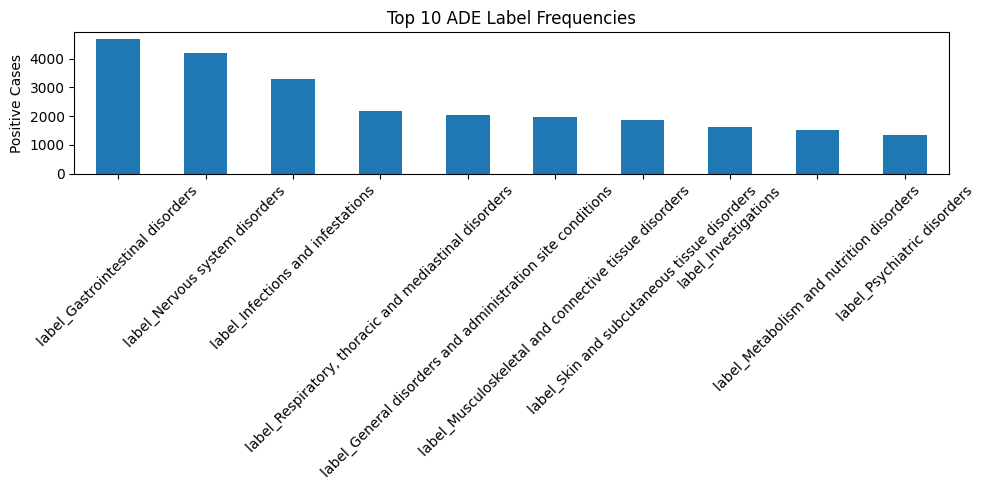

In [7]:
import matplotlib.pyplot as plt

# Count positive cases for each label
label_distribution = df[target_cols].sum().sort_values(ascending=False)

# Plot top 10 ADEs
label_distribution.head(10).plot(kind="bar", figsize=(10, 5))
plt.title("Top 10 ADE Label Frequencies")
plt.ylabel("Positive Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## preparing the dataset 

* it's essential for us to transform the SMILES drug formats into proper chemical programming language 

In [1]:
import pandas as pd

# Adjust paths if needed
df_train = pd.read_csv("Data/CT-ADE-SOC/train.csv")
df_val = pd.read_csv("Data/CT-ADE-SOC/val.csv")
df_test = pd.read_csv("Data/CT-ADE-SOC/test.csv")

# Identify target columns
target_cols = [col for col in df_train.columns if col.startswith("label_")]

print(f"Target columns: {target_cols}")


Target columns: ['label_Blood and lymphatic system disorders', 'label_Cardiac disorders', 'label_Congenital, familial and genetic disorders', 'label_Ear and labyrinth disorders', 'label_Endocrine disorders', 'label_Eye disorders', 'label_Gastrointestinal disorders', 'label_General disorders and administration site conditions', 'label_Hepatobiliary disorders', 'label_Immune system disorders', 'label_Infections and infestations', 'label_Injury, poisoning and procedural complications', 'label_Investigations', 'label_Metabolism and nutrition disorders', 'label_Musculoskeletal and connective tissue disorders', 'label_Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'label_Nervous system disorders', 'label_Pregnancy, puerperium and perinatal conditions', 'label_Psychiatric disorders', 'label_Renal and urinary disorders', 'label_Reproductive system and breast disorders', 'label_Respiratory, thoracic and mediastinal disorders', 'label_Skin and subcutaneous tissue disorders

## Featurize SMILES with ECFP (1024-bit)

In [5]:
import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm import tqdm

# Target directory
output_dir = "Data/clean"
os.makedirs(output_dir, exist_ok=True)

# File paths
datasets = {
    "train": "Data/CT-ADE-SOC/train.csv",
    "val": "Data/CT-ADE-SOC/val.csv",
    "test": "Data/CT-ADE-SOC/test.csv"
}

# Utility: Convert SMILES to ECFP (1024-bit)
def smiles_to_ecfp(smiles, n_bits=1024, radius=2):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    else:
        return None

# Featurize and save
for split, path in datasets.items():
    print(f"🧪 Processing {split} set...")

    df = pd.read_csv(path)
    
    # Identify targets
    target_cols = [col for col in df.columns if col.startswith("label_")]
    
    # Featurize SMILES
    ecfp_rows = []
    valid_rows = []
    for i, s in tqdm(enumerate(df['smiles']), total=len(df)):
        fp = smiles_to_ecfp(s)
        if fp:
            arr = np.zeros((1024,))
            AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
            ecfp_rows.append(arr)
            valid_rows.append(i)

    # Create DataFrame with features + labels
    df_valid = df.iloc[valid_rows].reset_index(drop=True)
    X_ecfp = pd.DataFrame(ecfp_rows, columns=[f'fp_{i}' for i in range(1024)])
    y_labels = df_valid[target_cols].reset_index(drop=True)
    df_clean = pd.concat([X_ecfp, y_labels], axis=1)

    # Save to CSV
    out_path = os.path.join(output_dir, f"clean_{split}.csv")
    df_clean.to_csv(out_path, index=False)
    print(f"✅ Saved cleaned {split} set to {out_path}")


🧪 Processing train set...


  3%|▎         | 405/12419 [00:00<00:02, 4016.68it/s][22:00:51] WARNING: not removing hydrogen atom without neighbors
[22:00:51] WARNING: not removing hydrogen atom without neighbors
  6%|▋         | 807/12419 [00:00<00:03, 3444.80it/s][22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
  9%|▉         | 1157/12419 [00:00<00:03, 3083.39it/s][22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neighbors
[22:00:52] WARNING: not removing hydrogen atom without neigh

✅ Saved cleaned train set to Data/clean\clean_train.csv
🧪 Processing val set...


100%|██████████| 1518/1518 [00:00<00:00, 4597.66it/s]


✅ Saved cleaned val set to Data/clean\clean_val.csv
🧪 Processing test set...


100%|██████████| 1260/1260 [00:00<00:00, 2997.82it/s]


✅ Saved cleaned test set to Data/clean\clean_test.csv


In [24]:
df_clean_train= pd.read_csv("Data/clean/clean_train.csv")
df_clean_test= pd.read_csv("Data/clean/clean_test.csv")
df_clean_val= pd.read_csv("Data/clean/clean_val.csv")

print (" Size of our clean train df:", {df_clean_train.shape})
print (" Size of our clean test df:", {df_clean_test.shape})
print (" Size of our clean val df:", {df_clean_val.shape})

 Size of our clean train df: {(12419, 1051)}
 Size of our clean test df: {(1260, 1051)}
 Size of our clean val df: {(1518, 1051)}


## load and split data

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned datasets
df_train = pd.read_csv("Data/clean/clean_train.csv")
df_val = pd.read_csv("Data/clean/clean_val.csv")
df_test = pd.read_csv("Data/clean/clean_test.csv")

# Identify target columns
target_cols = [col for col in df_train.columns if col.startswith("label_")]
feature_cols = [col for col in df_train.columns if col.startswith("fp_")]

# Split into X and y
X_train, y_train = df_train[feature_cols], df_train[target_cols]
X_val, y_val = df_val[feature_cols], df_val[target_cols]
X_test, y_test = df_test[feature_cols], df_test[target_cols]


## creating PyTorch Dataset + DataLoader 

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader

class DrugDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 64

train_loader = DataLoader(DrugDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(DrugDataset(X_val, y_val), batch_size=batch_size)
test_loader = DataLoader(DrugDataset(X_test, y_test), batch_size=batch_size)


## Define the MLP Model 

In [27]:
import torch.nn as nn

class MultiLabelMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, output_dim),
            nn.Sigmoid()  # multi-label: outputs probabilities for each class
        )
        
    def forward(self, x):
        return self.model(x)

model = MultiLabelMLP(input_dim=1024, output_dim=len(target_cols))


## Train the model 

In [28]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
for epoch in range(20):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f}")


Epoch 1 | Loss: 54.5645
Epoch 2 | Loss: 46.8262
Epoch 3 | Loss: 45.1378
Epoch 4 | Loss: 43.8796
Epoch 5 | Loss: 42.9825
Epoch 6 | Loss: 42.2851
Epoch 7 | Loss: 41.6689
Epoch 8 | Loss: 41.3037
Epoch 9 | Loss: 40.9650
Epoch 10 | Loss: 40.4320
Epoch 11 | Loss: 40.1300
Epoch 12 | Loss: 40.0953
Epoch 13 | Loss: 39.5078
Epoch 14 | Loss: 39.2885
Epoch 15 | Loss: 38.8602
Epoch 16 | Loss: 38.8069
Epoch 17 | Loss: 38.6267
Epoch 18 | Loss: 38.4103
Epoch 19 | Loss: 38.3529
Epoch 20 | Loss: 38.1848


## Evaluation 

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import numpy as np

def evaluate(model, dataloader, y_true_full):
    model.eval()
    y_probs = []
    with torch.no_grad():
        for xb, _ in dataloader:
            xb = xb.to(device)
            probs = model(xb).cpu().numpy()
            y_probs.append(probs)
    
    y_probs = np.vstack(y_probs)
    y_true = y_true_full.values

    # Threshold at 0.5 to get binary predictions
    y_pred = (y_probs > 0.5).astype(int)

    # Print global metrics
    print("🔍 Classification Report (micro avg):")
    print(classification_report(y_true, y_pred, target_names=target_cols, zero_division=0))

    # ROC-AUC (macro and micro)
    try:
        roc_auc_macro = roc_auc_score(y_true, y_probs, average="macro")
        roc_auc_micro = roc_auc_score(y_true, y_probs, average="micro")
        print(f"✅ ROC-AUC (Macro): {roc_auc_macro:.4f}")
        print(f"✅ ROC-AUC (Micro): {roc_auc_micro:.4f}")
    except ValueError:
        print("⚠️ ROC-AUC could not be calculated (check for missing class cases).")

    # Average precision (micro)
    avg_precision = average_precision_score(y_true, y_probs, average="micro")
    print(f"✅ Average Precision (micro): {avg_precision:.4f}")

# Run it on validation or test
print("🧪 Evaluation on Validation Set")
evaluate(model, val_loader, y_val)

print("\n🧪 Evaluation on Test Set")
evaluate(model, test_loader, y_test)


🧪 Evaluation on Validation Set
🔍 Classification Report (micro avg):
                                                                           precision    recall  f1-score   support

                               label_Blood and lymphatic system disorders       0.33      0.17      0.22       167
                                                  label_Cardiac disorders       0.00      0.00      0.00       128
                         label_Congenital, familial and genetic disorders       0.00      0.00      0.00         6
                                        label_Ear and labyrinth disorders       0.00      0.00      0.00        36
                                                label_Endocrine disorders       0.00      0.00      0.00        22
                                                      label_Eye disorders       0.38      0.13      0.19       101
                                         label_Gastrointestinal disorders       0.54      0.37      0.44       629
           